In [1]:
#Rohitashwa Ray Chowdhury
#importing all libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import math
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.patches as mpatches
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import tracemalloc
import time
from fractions import Fraction
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import multivariate_normal
from numpy import exp
from matplotlib import pyplot
from numpy import sqrt
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score,precision_score,accuracy_score,precision_recall_curve,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

In [2]:
#loading the dataset
dataset = pd.read_csv("Abnormal_IP_detection.csv")

In [3]:
dataset.head()

,requests,request-interval,request-popularity,bytes,delivery-time,hit-rate,nodes,contents,label
0,27,537.329852,1.0,14.447266,17.444444,0.925926,4,18,0
1,5,0.031200,1.0,126.134570,29.200000,1.000000,1,5,0
2,60,386.569217,1.0,17.346110,89.450000,1.000000,1,59,0
3,42,254.592976,1.0,18.032971,33.476190,0.976190,3,24,0
4,2,15201.067000,1.0,10.734375,3.500000,1.000000,1,1,0


In [4]:
#Question 1) Indicate the ratio of the normal and anomaly examples in the dataset. Make a bar chart to visualize the ratios [7 points].
#calculating anomaly and normal values 
dataset['label'].value_counts()

0    49073
1     1683
Name: label, dtype: int64

In [5]:
#calculating ratio of normal to anomaly.

ratio = float(49073/1683)
print(ratio)

29.15805109922757


In [6]:
#calcuating ratio as fraction
print(Fraction(ratio).limit_denominator())

49073/1683


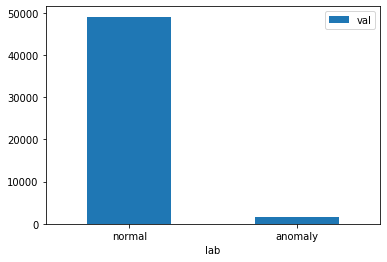

In [7]:
#plotting the ratio(fraction).
df = pd.DataFrame({'lab':['normal', 'anomaly'], 'val':[49073, 1683]})
ax = df.plot.bar(x='lab', y='val', rot=0)

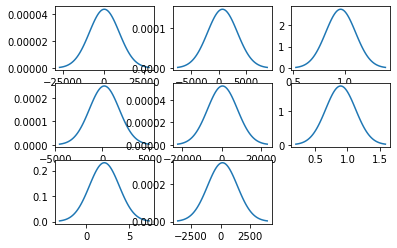

In [8]:
#Question 2) Plot the probability density function (PDF) of each feature, and make your observations of the pdf of each feature (i.e., normal distribution, left-skewed distribution, right-skewed distribution, ...) [7 points].

#plotting the pdf of each feature
ax1 = plt.subplot(331)
meannew=np.mean(dataset['requests'])
varnew=np.var(dataset['requests'])
sigma = np.sqrt(varnew)
x = np.linspace(meannew - 3*sigma, meannew + 3*sigma, 100)
plt.plot(x, norm.pdf(x, meannew, sigma))
ax2 = plt.subplot(332)
meannew=np.mean(dataset['request-interval'])
varnew=np.var(dataset['request-interval'])
sigma = np.sqrt(varnew)
x = np.linspace(meannew - 3*sigma, meannew + 3*sigma, 100)
plt.plot(x, norm.pdf(x, meannew, sigma))
ax3 = plt.subplot(333)
meannew=np.mean(dataset['request-popularity'])
varnew=np.var(dataset['request-popularity'])
sigma = np.sqrt(varnew)
x = np.linspace(meannew - 3*sigma, meannew + 3*sigma, 100)
plt.plot(x, norm.pdf(x, meannew, sigma))
ax4 = plt.subplot(334)
meannew=np.mean(dataset['bytes'])
varnew=np.var(dataset['bytes'])
sigma = np.sqrt(varnew)
x = np.linspace(meannew - 3*sigma, meannew + 3*sigma, 100)
plt.plot(x, norm.pdf(x, meannew, sigma))
ax5 = plt.subplot(335)
meannew=np.mean(dataset['delivery-time'])
varnew=np.var(dataset['delivery-time'])
sigma = np.sqrt(varnew)
x = np.linspace(meannew - 3*sigma, meannew + 3*sigma, 100)
plt.plot(x, norm.pdf(x, meannew, sigma))
ax6 = plt.subplot(336)
meannew=np.mean(dataset['hit-rate'])
varnew=np.var(dataset['hit-rate'])
sigma = np.sqrt(varnew)
x = np.linspace(meannew - 3*sigma, meannew + 3*sigma, 100)
plt.plot(x, norm.pdf(x, meannew, sigma))
ax7 = plt.subplot(337)
meannew=np.mean(dataset['nodes'])
varnew=np.var(dataset['nodes'])
sigma = np.sqrt(varnew)
x = np.linspace(meannew - 3*sigma, meannew + 3*sigma, 100)
plt.plot(x, norm.pdf(x, meannew, sigma))
ax8 = plt.subplot(338)
meannew=np.mean(dataset['contents'])
varnew=np.var(dataset['contents'])
sigma = np.sqrt(varnew)
x = np.linspace(meannew - 3*sigma, meannew + 3*sigma, 100)
plt.plot(x, norm.pdf(x, meannew, sigma))

In [9]:
#dropping 'label' from main dataset
datasetNew=dataset.drop(['label'],axis=1)

In [10]:
datasetNew.head()

,requests,request-interval,request-popularity,bytes,delivery-time,hit-rate,nodes,contents
0,27,537.329852,1.0,14.447266,17.444444,0.925926,4,18
1,5,0.031200,1.0,126.134570,29.200000,1.000000,1,5
2,60,386.569217,1.0,17.346110,89.450000,1.000000,1,59
3,42,254.592976,1.0,18.032971,33.476190,0.976190,3,24
4,2,15201.067000,1.0,10.734375,3.500000,1.000000,1,1


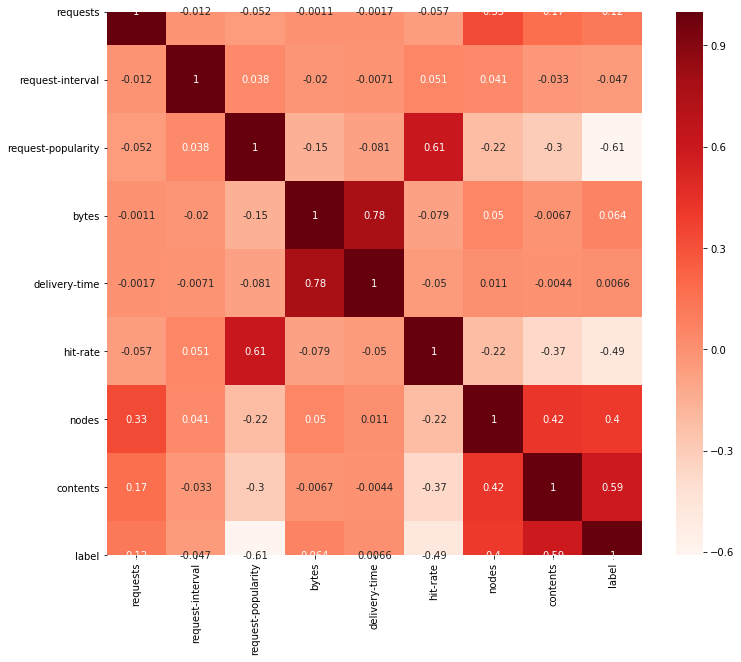

In [11]:
#Question 3) Find the correlation between the features. Indicate the highly correlated features and the independent features [7 points].

#generating the correlation matrix using a heat map.
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
cor_target = abs(cor["label"])
#Selecting highly correlated features and the least or almost independent features.
relevant_features = cor_target[cor_target>0.0]
relevant_features
#Question 4) Apply any signiﬁcance test to rank the signiﬁcance of each feature as being a distinctive feature of anomalies [7 points].

#ranking the features based on correlation feature selection from above
relevant_features.sort_values(ascending=False)

label                 1.000000
request-popularity    0.610096
contents              0.588138
hit-rate              0.487060
nodes                 0.404002
requests              0.120987
bytes                 0.063888
request-interval      0.046850
delivery-time         0.006621
Name: label, dtype: float64

Text(0.5, 1.0, 'contents prob plot')

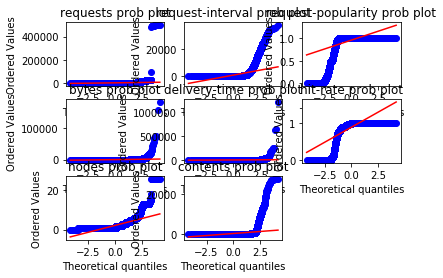

In [13]:
#Question 5) Apply a suitable transformation to make better suit the Gaussian shape. Plot the normal probability plot and the pdf of each feature before and after the transformation. Also, indicate the formula that is used to transform each feature (i.e., yi = log(xi)) [10 points]. 
#plotting normal probability before square root transform
ax1 = plt.subplot(331)
res = stats.probplot(dataset['requests'], plot=plt)
ax1.set_title('requests prob plot')
ax2 = plt.subplot(332)
res = stats.probplot(dataset['request-interval'], plot=plt)
ax2.set_title('request-interval prob plot')
ax3 = plt.subplot(333)
res = stats.probplot(dataset['request-popularity'], plot=plt)
ax3.set_title('request-popularity prob plot')
ax4 = plt.subplot(334)
res = stats.probplot(dataset['bytes'], plot=plt)
ax4.set_title('bytes prob plot')
ax5 = plt.subplot(335)
res = stats.probplot(dataset['delivery-time'], plot=plt)
ax5.set_title('delivery-time prob plot')
ax6 = plt.subplot(336)
res = stats.probplot(dataset['hit-rate'], plot=plt)
ax6.set_title('hit-rate prob plot')
ax7 = plt.subplot(337)
res = stats.probplot(dataset['nodes'], plot=plt)
ax7.set_title('nodes prob plot')
ax8 = plt.subplot(338)
res = stats.probplot(dataset['contents'], plot=plt)
ax8.set_title('contents prob plot')

Text(0.5, 1.0, 'contents after transform prob plot')

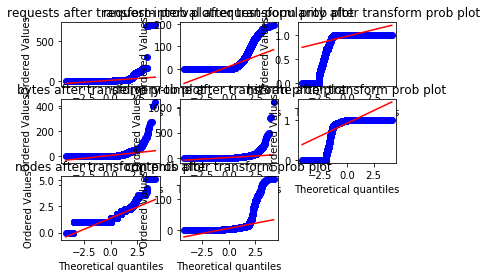

In [14]:
#plotting normal probability after square root transform
ax1 = plt.subplot(331)
tr1=np.sqrt(dataset['requests'])
res = stats.probplot(tr1, plot=plt)
ax1.set_title('requests after transform prob plot')
ax2 = plt.subplot(332)
tr2=np.sqrt(dataset['request-interval'])
res = stats.probplot(tr2, plot=plt)
ax2.set_title('request-interval after transform prob plot')
ax3 = plt.subplot(333)
tr3=np.sqrt(dataset['request-popularity'])
res = stats.probplot(tr3, plot=plt)
ax3.set_title('request-popularity after transform prob plot')
ax4 = plt.subplot(334)
tr4=np.sqrt(dataset['bytes'])
res = stats.probplot(tr4, plot=plt)
ax4.set_title('bytes after transform prob plot')
ax5 = plt.subplot(335)
tr5=np.sqrt(dataset['delivery-time'])
res = stats.probplot(tr5, plot=plt)
ax5.set_title('delivery-time after transform prob plot')
ax6 = plt.subplot(336)
tr6=np.sqrt(dataset['hit-rate'])
res = stats.probplot(tr6, plot=plt)
ax6.set_title('hit-rate after transform prob plot')
ax7 = plt.subplot(337)
tr7=np.sqrt(dataset['nodes'])
res = stats.probplot(tr7, plot=plt)
ax7.set_title('nodes after transform prob plot')
ax8 = plt.subplot(338)
tr8=np.sqrt(dataset['contents'])
res = stats.probplot(tr8, plot=plt)
ax8.set_title('contents after transform prob plot')

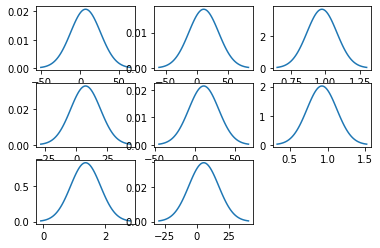

In [15]:
#plotting PDF after square root transform. Before transform graphs available in question number 2.
ax1 = plt.subplot(331)
tr1=np.sqrt(dataset['requests'])
meannew=np.mean(tr1)
varnew=np.var(tr1)
sigma = np.sqrt(varnew)
x = np.linspace(meannew - 3*sigma, meannew + 3*sigma, 100)
plt.plot(x, norm.pdf(x, meannew, sigma))
ax2 = plt.subplot(332)
tr2=np.sqrt(dataset['request-interval'])
meannew=np.mean(tr2)
varnew=np.var(tr2)
sigma = np.sqrt(varnew)
x = np.linspace(meannew - 3*sigma, meannew + 3*sigma, 100)
plt.plot(x, norm.pdf(x, meannew, sigma))
ax3 = plt.subplot(333)
tr3=np.sqrt(dataset['request-popularity'])
meannew=np.mean(tr3)
varnew=np.var(tr3)
sigma = np.sqrt(varnew)
x = np.linspace(meannew - 3*sigma, meannew + 3*sigma, 100)
plt.plot(x, norm.pdf(x, meannew, sigma))
ax4 = plt.subplot(334)
tr4=np.sqrt(dataset['bytes'])
meannew=np.mean(tr4)
varnew=np.var(tr4)
sigma = np.sqrt(varnew)
x = np.linspace(meannew - 3*sigma, meannew + 3*sigma, 100)
plt.plot(x, norm.pdf(x, meannew, sigma))
ax5 = plt.subplot(335)
tr5=np.sqrt(dataset['delivery-time'])
meannew=np.mean(tr5)
varnew=np.var(tr5)
sigma = np.sqrt(varnew)
x = np.linspace(meannew - 3*sigma, meannew + 3*sigma, 100)
plt.plot(x, norm.pdf(x, meannew, sigma))
ax6 = plt.subplot(336)
tr6=np.sqrt(dataset['hit-rate'])
meannew=np.mean(tr6)
varnew=np.var(tr6)
sigma = np.sqrt(varnew)
x = np.linspace(meannew - 3*sigma, meannew + 3*sigma, 100)
plt.plot(x, norm.pdf(x, meannew, sigma))
ax7 = plt.subplot(337)
tr7=np.sqrt(dataset['nodes'])
meannew=np.mean(tr7)
varnew=np.var(tr7)
sigma = np.sqrt(varnew)
x = np.linspace(meannew - 3*sigma, meannew + 3*sigma, 100)
plt.plot(x, norm.pdf(x, meannew, sigma))
ax8 = plt.subplot(338)
tr8=np.sqrt(dataset['contents'])
meannew=np.mean(tr8)
varnew=np.var(tr8)
sigma = np.sqrt(varnew)
x = np.linspace(meannew - 3*sigma, meannew + 3*sigma, 100)
plt.plot(x, norm.pdf(x, meannew, sigma))

In [16]:
#Question 6) Split the data randomly into 70 training and 30 testing datasets. Make sure that the training dataset contains 70 of the total anomalies and the testing dataset contains 30 of the total anomalies. Indicate the ratio of the normal and anomaly examples for both datasets. [7 points].

#splitting dataset based on 'label' column value into normal and anomaly datasets.
normal_data = dataset[dataset['label']==0]
anomaly_data = dataset[dataset['label']==1]

In [17]:
#splitting the normal dataset into test and train in 70:30 ratio
normal_train,normal_test = train_test_split(normal_data,test_size=0.3,random_state=0)
print(normal_train.shape)
print(normal_test.shape)

(34351, 9)
(14722, 9)


In [18]:
#splitting the anomaly dataset into test and train in 70:30 ratio
anomaly_train,anomaly_test = train_test_split(anomaly_data,test_size=0.3,random_state=0)
print(anomaly_train.shape)
print(anomaly_test.shape)

(1178, 9)
(505, 9)


In [19]:
#concating both train datasets to form the train data.(70% of total anomalies)
train_data = pd.concat([normal_train,anomaly_train])
train_data['label'].value_counts()

0    34351
1     1178
Name: label, dtype: int64

In [20]:
#concating both test datasets to form the test data.(30% of total anomalies)
test_data = pd.concat([normal_test,anomaly_test])
test_data['label'].value_counts()

0    14722
1      505
Name: label, dtype: int64

In [21]:
#creating train_data_y and test_data_y
train_data_y=train_data['label']
test_data_y=test_data['label']

In [22]:
#creating train_data_x and test_data_x
train_data_x=train_data.drop(labels='label',axis=1)
test_data_x=test_data.drop(labels='label',axis=1)

In [23]:
#Question 7) - Model the features in the training dataset (all features, columns A, B, ..., H) using the multivariate Gaussian distribution. Please write down the expression of the multivariate Gaussian distribution and show the mean vector and the connivance matrix. [10 points].

#finding mean, covariance and variance based on the training dataset.
meannew=np.mean(train_data_x)
covnew=np.cov(train_data_x.T)
varnew=np.var(train_data_x)

In [24]:
#displaying the covariance matrix
covnew

array([[ 9.15745988e+07, -3.02838452e+05, -6.67884162e+01,
        -1.59717312e+04, -1.24486811e+05, -1.16757595e+02,
         5.59408410e+03,  1.92067810e+06],
       [-3.02838452e+05,  7.58351624e+06,  1.47781158e+01,
        -8.03784111e+04, -1.27714811e+05,  3.19486122e+01,
         1.83900692e+02, -1.10991291e+05],
       [-6.67884162e+01,  1.47781158e+01,  2.11255071e-02,
        -3.77602630e+01, -1.06253142e+02,  2.01081229e-02,
        -5.49255920e-02, -5.29435436e+01],
       [-1.59717312e+04, -8.03784111e+04, -3.77602630e+01,
         2.24815241e+06,  9.18483574e+06, -2.89199707e+01,
         1.40555761e+02, -1.21937191e+04],
       [-1.24486811e+05, -1.27714811e+05, -1.06253142e+02,
         9.18483574e+06,  6.75260962e+07, -9.40906454e+01,
         1.46176428e+02, -4.23342705e+04],
       [-1.16757595e+02,  3.19486122e+01,  2.01081229e-02,
        -2.89199707e+01, -9.40906454e+01,  5.24823770e-02,
        -8.68704803e-02, -1.04760464e+02],
       [ 5.59408410e+03,  1.839006

In [25]:
#displaying the mean vector
meannew

requests              435.903150
request-interval      716.680448
request-popularity      0.961973
bytes                 196.603471
delivery-time         475.366777
hit-rate                0.894961
nodes                   2.103127
contents              163.403332
dtype: float64

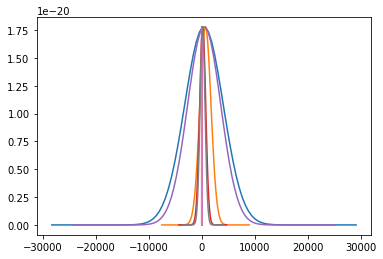

In [26]:
#calculating and plotting the gaussian distribution based on the training dataset.(8 graphs obtained for 8 features)
#plotting using the 3 sigma limit linespace 
sigma = np.sqrt(varnew)
x = np.linspace(meannew - 3*sigma, meannew + 3*sigma, 100)
plt.plot(x, multivariate_normal.pdf(x, meannew, covnew, allow_singular=True))
plt.show()

In [27]:
#defining the function to calculate accuracy scores.
def Print_Accuracy_Scores(y,y_pred):
    print("F1 Score: ", f1_score(y,y_pred))
    print("Precision Score: ", precision_score(y,y_pred))
    print("Recall Score: ", recall_score(y,y_pred))

In [28]:
#Question 8) Develop an anomaly alarm by adjusting a threshold  to your Gaussian models obtained in Questions 7, and accordingly, generate the anomaly alarm. Evaluate its performance using relative metrics (use the label column as a benchmark for the true anomalies). [10 points]. hint: use the testing dataset for performance evaluation.

#Using random epsilon (threshold) value to generate anomaly alarms
#using malloc and time to calculate training time and memory.
start = time.time()
tracemalloc.start()
meannew=np.mean(test_data_x)
covnew=np.cov(test_data_x.T)
pdf_test_x=multivariate_normal.pdf(test_data_x, meannew, covnew, allow_singular=True)
current, peak = tracemalloc.get_traced_memory()
print(f"TRAINING/PREDICTION: Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
end = time.time()
print(f"TRAINING/PREDICTION: Time used is {end - start}")

TRAINING/PREDICTION: Current memory usage is 0.125305MB; Peak was 3.902159MB
TRAINING/PREDICTION: Time used is 0.005987644195556641


In [29]:
#using epsilon value of 0.01
#calculating execution time and memory
start = time.time()
tracemalloc.start()
p_test_y=(pdf_test_x < 0.01)

In [30]:
#printing pdf accuracy scores using epsilon=0.01
Print_Accuracy_Scores(test_data_y,p_test_y)
current, peak = tracemalloc.get_traced_memory()
print(f"TRAINING/PREDICTION: Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
end = time.time()
print(f"TRAINING/PREDICTION: Time used is {end - start}")

F1 Score:  0.0642003559623697
Precision Score:  0.03316477310041374
Recall Score:  1.0
TRAINING/PREDICTION: Current memory usage is 0.203963MB; Peak was 0.751823MB
TRAINING/PREDICTION: Time used is 0.12945342063903809


Text(0.5, 1, 'Normalized Confusion Matrix - Test data')

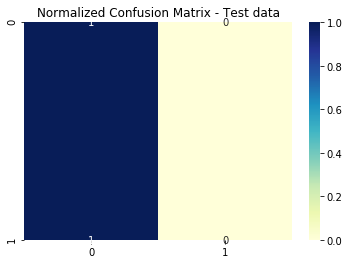

In [31]:
#confusion matrix for the generated alarms using epsilon=0.01.
cnf_matrix = confusion_matrix(test_data_y, p_test_y, labels=[1,0])
row_sum = cnf_matrix.sum(axis=1,keepdims=True)
cnf_matrix_norm =cnf_matrix / row_sum 
sns.heatmap(cnf_matrix_norm,cmap='YlGnBu',annot=True)
plt.title("Normalized Confusion Matrix - Test data")

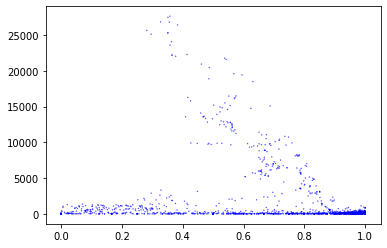

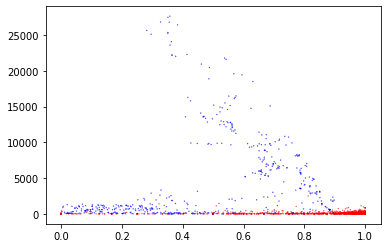

In [32]:
#Question 9) Plot the generated alarm, true anomaly labels (given in label column from the dataset), and the feature of the most important feature obtained from the ranking test in Question 4 [5 points].

#plotting the predicted alarms, original anomalies and the highest correlated attribute "request-popularity"
colormap = np.array(['Red', 'Blue'])
#scatter plot for the "request-popularity" against the predicted flagged anomalies
z = plt.scatter(test_data_x['request-popularity'],test_data_x['contents'], c = colormap[p_test_y*1], s=0.1)
plt.show()
#scatter plot for the "request-popularity" against the original true anomalies
z2 = plt.scatter(test_data_x['request-popularity'],test_data_x['contents'], c = colormap[test_data_y*1], s=0.1)
plt.show()

In [33]:
#Question 10) Apply one supervised learning approach, using all features (columns A, B, ..., H), for classifying the events to normal and anomalies. Use relative performance metrics to evaluate its performance [15 points]. hint: use the training dataset for training and testing dataset for performance evaluation.

#using random forest classifier to train the model and predict the target value to find the algorithm's accuracy.
clf = RandomForestClassifier(max_depth=5, random_state=3, n_estimators=200)

In [34]:
#using malloc and time to calculate training time and memory.
start = time.time()
tracemalloc.start()
clf.fit(train_data_x, train_data_y)
current, peak = tracemalloc.get_traced_memory()
print(f"TRAINING/PREDICTION: Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
end = time.time()
print(f"TRAINING/PREDICTION: Time used is {end - start}")

TRAINING/PREDICTION: Current memory usage is 0.169395MB; Peak was 4.161564MB
TRAINING/PREDICTION: Time used is 2.829427719116211


In [35]:
#calculating execution time and memory
start = time.time()
tracemalloc.start()
predictions=clf.predict(test_data_x)
current, peak = tracemalloc.get_traced_memory()
print(f"TRAINING/PREDICTION: Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
end = time.time()
print(f"TRAINING/PREDICTION: Time used is {end - start}")

TRAINING/PREDICTION: Current memory usage is 0.29222MB; Peak was 1.61502MB
TRAINING/PREDICTION: Time used is 0.16160821914672852


In [36]:
#accuracy score of random forest classifier
Print_Accuracy_Scores(test_data_y,predictions)

F1 Score:  0.9722222222222222
Precision Score:  0.974155069582505
Recall Score:  0.9702970297029703


In [37]:
#Question 11) Apply any clustering based algorithm, using all features (columns A, B, ..., H), to separate the anomaly data from the normal ones. [15 points]. hint: you can use the entire dataset for performance evaluation of the clustering algorithm.

#using K means clustering algorithm to train the model and predict the target value to find the algorithm's accuracy.
dataset_Y=dataset['label']
#using malloc and time to calculate training time and memory.
start = time.time()
tracemalloc.start()
kmeans = KMeans(n_clusters=2, random_state=0).fit(datasetNew)
current, peak = tracemalloc.get_traced_memory()
print(f"TRAINING/PREDICTION: Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
end = time.time()
print(f"TRAINING/PREDICTION: Time used is {end - start}")

TRAINING/PREDICTION: Current memory usage is 0.371433MB; Peak was 11.339779MB
TRAINING/PREDICTION: Time used is 0.20545363426208496


In [38]:
#calculating execution time and memory
start = time.time()
tracemalloc.start()
predKmean=kmeans.predict(datasetNew)
current, peak = tracemalloc.get_traced_memory()
print(f"TRAINING/PREDICTION: Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
end = time.time()
print(f"TRAINING/PREDICTION: Time used is {end - start}")

TRAINING/PREDICTION: Current memory usage is 0.360493MB; Peak was 6.451147MB
TRAINING/PREDICTION: Time used is 0.008976459503173828


In [39]:
#accuracy score of K means
test_acc = accuracy_score(dataset_Y,predKmean)*100

In [40]:
test_acc

96.65064228859642

In [41]:
#confusion matrix of K means
conf_matrix = confusion_matrix(dataset_Y,predKmean, labels=[1,0])
print(conf_matrix)

[[    0  1683]
 [   17 49056]]


In [42]:
# True negatives
TN = conf_matrix[0][0]
# True positives
TP = conf_matrix[1][1]
# False negatives
FN = conf_matrix[1][0]
# False positives
FP = conf_matrix[0][1]

TPR = float(TP)/(TP+FN)
print('TPR = %4.2f%%' % (TPR*100))

TNR = float(TN)/(TN+FP)
print('TNR = %4.2f%%' % (TNR*100))

PPV = float(TP)/(TP+FP)
print('PPV = %4.2f%%' % (PPV*100))

NPV = float(TN)/(TN+FN)
print('NPV = %4.2f%%' % (NPV*100))

TPR = 99.97%
TNR = 0.00%
PPV = 96.68%
NPV = 0.00%


# Question 12) Answer written in the document.

In [43]:
#Question 13) Optimize the parameter  from Question 8 to maximize the detection rate and minimizing the false alarm rate (multi-objective optimization).[15 points]. Particularly, consider the following objectives “jointly”:
#– Objective 1: Minimize the number of generated false alarms.
#– Objective 2: Maximize the number true anomalies discovered.
#Defining function for selecting epsilon with best F1-score (optimising the epsilon value)
def SelectThresholdByCV_Anomaly(probs,y):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    precision =0
    recall=0
    best_recall = 0
    best_precision = 0
    
    epsilons = sorted(np.unique(probs))
    #print(epsilons)
    
    precisions=[]
    recalls=[]
    for epsilon in epsilons:
        predictions = (probs < epsilon)
        f = f1_score(y, predictions)
        precision = precision_score(y, predictions)
        recall = recall_score(y, predictions)
        #print("Theshold {0},Precision {1},Recall {2}".format(epsilon,precision,recall))
          
        if f > best_f1:
            best_f1 = f
            best_precision = precision
            best_recall = recall
            best_epsilon = epsilon
        
        precisions.append(precision)
        recalls.append(recall)

    #Precision-Recall Trade-off
    plt.plot(epsilons,precisions,label='Precision')
    plt.plot(epsilons,recalls,label='Recall')
    plt.xlabel("Epsilon")
    plt.title('Precision Recall Trade Off')
    plt.legend()
    plt.show()

    print ('Best F1 Score %f' %best_f1)
    print ('Best Precision Score %f' %best_precision)
    print ('Best Recall Score %f' %best_recall)
    print ('Best Epsilon', best_epsilon)

C:\Users\rcron\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\rcron\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


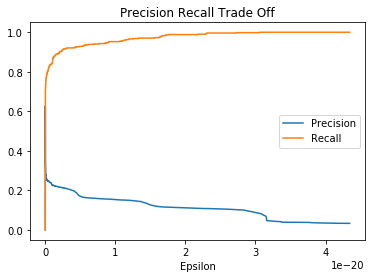

Best F1 Score 0.466835
Best Precision Score 0.405248
Best Recall Score 0.550495
Best Epsilon 1.1008593637875207e-24


In [44]:
#Calculating the best epsilon using the previously defined function.
SelectThresholdByCV_Anomaly(pdf_test_x,test_data_y)

In [45]:
#generating the anomaly alarms using the calculated epsilon or threshold
p_test_y=(pdf_test_x < 1.1008593637875207e-24)

In [46]:
#printing the accuracy scores of the generated alarms
Print_Accuracy_Scores(test_data_y,p_test_y)

F1 Score:  0.46683459277917716
Precision Score:  0.40524781341107874
Recall Score:  0.5504950495049505


Text(0.5, 1, 'Normalized Confusion Matrix - Test data')

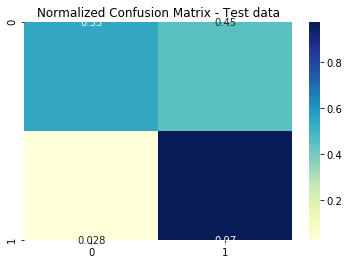

In [47]:
#confusion matrix for the generated alarms using optimised epsilon.
cnf_matrix = confusion_matrix(test_data_y, p_test_y, labels=[1,0])
row_sum = cnf_matrix.sum(axis=1,keepdims=True)
cnf_matrix_norm =cnf_matrix / row_sum 
sns.heatmap(cnf_matrix_norm,cmap='YlGnBu',annot=True)
plt.title("Normalized Confusion Matrix - Test data")